# GoogleNet 구조

In [ ]:
import torch
import torch.nn as nn

### inception module class

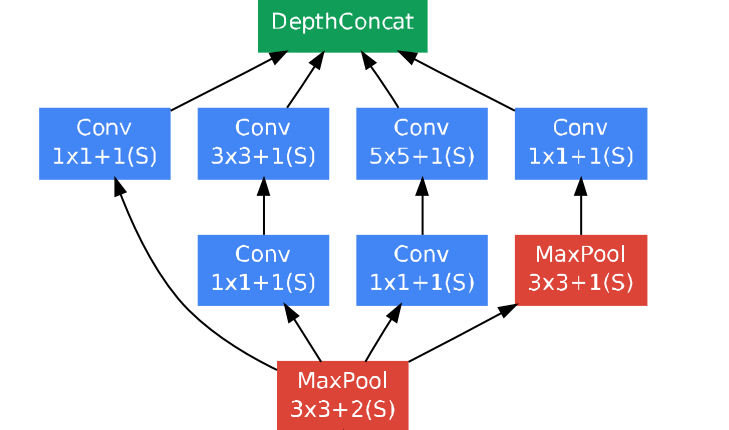

In [ ]:
class InceptionBlock(nn.Module):
   def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
       super(InceptionBlock, self).__init__()

       # 1x1 convolution branch
       self.branch1 = nn.Sequential(
           nn.Conv2d(in_channels, ch1x1, kernel_size=1),
           nn.ReLU(inplace=True)
       )

       # 1x1 convolution -> 3x3 convolution branch
       self.branch2 = nn.Sequential(
           nn.Conv2d(in_channels, ch3x3red, kernel_size=1),
           nn.ReLU(inplace=True),
           nn.Conv2d(ch3x3red, ch3x3, kernel_size=3, padding=1),
           nn.ReLU(inplace=True)
       )

       # 1x1 convolution -> 5x5 convolution branch
       self.branch3 = nn.Sequential(
           nn.Conv2d(in_channels, ch5x5red, kernel_size=1),
           nn.ReLU(inplace=True),
           nn.Conv2d(ch5x5red, ch5x5, kernel_size=5, padding=2),
           nn.ReLU(inplace=True)
       )

       # 3x3 max pooling -> 1x1 convolution branch
       self.branch4 = nn.Sequential(
           nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
           nn.Conv2d(in_channels, pool_proj, kernel_size=1),
           nn.ReLU(inplace=True)
       )

   def forward(self, x):
       # torch.cat # 1 == c / b, c, h, w


### Auxilary classifier class

In [ ]:
class AuxiliaryClassifier(nn.Module):
   def __init__(self, in_channels, num_classes):
       super(AuxiliaryClassifier, self).__init__()

       self.avgpool = nn.AvgPool2d(kernel_size=5, stride=3)
       self.conv = nn.Conv2d(in_channels, 128, kernel_size=1)
       self.relu = nn.ReLU(inplace=True)
       self.fc1 = nn.Linear(2048, 1024)
       self.dropout = nn.Dropout(p=0.7)
       self.fc2 = nn.Linear(1024, num_classes)

   def forward(self, x):



### main modeling class

In [ ]:
class GoogLeNet(nn.Module):
   def __init__(self, num_classes=1000, aux_logits=True):
       super(GoogLeNet, self).__init__()

       self.aux_logits = aux_logits

       # Initial layers
       self.conv1 =

       self.conv2 =

       # Inception blocks
       self.inception3a =
       self.inception3b =
       self.maxpool3 =

       self.inception4a =
       self.inception4b =
       self.inception4c =
       self.inception4d =
       self.inception4e =
       self.maxpool4 =

       self.inception5a =
       self.inception5b =

       # Auxiliary classifiers
       if self.aux_logits:
           self.aux1 =
           self.aux2 =

       # Final layers
       self.avgpool =
       self.dropout =
       self.fc =

   def forward(self, x):


In [ ]:
def train():
   device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
   model = GoogLeNet(num_classes=1000, aux_logits=True).to(device)

   # Loss and optimizer
   criterion = nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

   # Training loop
   model.train()
   for epoch in range(num_epochs):
       for inputs, labels in train_loader:
           inputs = inputs.to(device)
           labels = labels.to(device)

           # Forward pass
           if model.aux_logits:
               outputs, aux1, aux2 = model(inputs)
               loss1 = criterion(outputs, labels)
               loss2 = criterion(aux1, labels)
               loss3 = criterion(aux2, labels)
               loss = loss1 + 0.3*(loss2 + loss3)
           else:
               outputs = model(inputs)
               loss = criterion(outputs, labels)

           # Backward and optimize
           optimizer.zero_grad()
           loss.backward()
           optimizer.step()